
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

## Práctica 2. Espacios de Color. Histograma


### Convertiendo imágenes entre diferentes espacios de color

OpenCV implementa diferentes modelos de color. Algunos modelos de color son normalmente usados por dispositivos de entrada tales como cámaras, mientras que otros modelos son usados en dispositivos de salida como televisiones, displays o impresoras. 
Normalmente cuando trabajamos con técnicas de visión por computador con imágenes, lo común es trabajar con tres tipos de modelos de color: niveles de gris, BGR o RGB y hue-saturation-value (HSV).



#### Hue Saturation Value HSV 

El modelo HSV se caracteriza por tener tres componentes:
* Color (Hue H): El rango permitido es de 0 a 179 
* Saturación (S): que describe la pureza del color. Con rango en [0-255]
* Brillo (V): Intensidad del color 0 es mas oscuro y 1 es más claro. Con rango en [0-255]
<table>
    <tr><td> <img src="Triangulo_HSV.png"></td><td><img src="hsv.webP"></td></tr>
</table>    

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('roco.png')
imgaux= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Covertimos a HSV
imghsv= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#mostramos la información del color, saturacion y brillo
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(imgaux)
plt.title("Original")

plt.subplot(2,2,2)
plt.imshow(imghsv[:,:,0],"gray")
plt.title("Color")

plt.subplot(2,2,3)
plt.imshow(imghsv[:,:,1],"gray")
plt.title("Saturación")


plt.subplot(2,2,4)
plt.imshow(imghsv[:,:,2],"gray")
plt.title("Brillo")

#HUE ES UN DISCO, EL ROJO ESTÁ EN EL 0 POR LO TANTO VALORES A LA IZQDA Y DCHA SON ROJOS, SEAN 179 A 1


Text(0.5, 1.0, 'Brillo')

Vamos a obtener los valores de los colores básicos (rojo, verde y azul) en hsv.

In [2]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print("Verde: ",hsv_green)

blue = np.uint8([[[255,0,0 ]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print("Azul:", hsv_blue)

red = np.uint8([[[0,0,255 ]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
print("Rojo:", hsv_red)

#EL ROJO ES EL 0, AZUL 120 Y VERDE 60.

Verde:  [[[ 60 255 255]]]
Azul: [[[120 255 255]]]
Rojo: [[[  0 255 255]]]


Para entender mejor el sistema HSV vamos a crear una imagen artificial toda con valores de rojo. La vamos a pasar a HSV para ver como se representa el rojo. A continuación vamos a variar la saturación.

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

rojo=np.ones((200, 200,3),dtype='uint8')*255
rojo[:,:,0]=0
rojo[:,:,1]=0
size=rojo.shape[:2]
rojohsv=cv2.cvtColor(rojo, cv2.COLOR_BGR2HSV)
print("Rojo: ",rojohsv[0,0,:])
fps=10

video =cv2.VideoWriter('rojos.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
aux = rojohsv;

img_array = []

for i in range(0,256):
    aux[:,:,1]=i
    #volvemos a rgb
    frame =cv2.cvtColor(aux,cv2.COLOR_HSV2BGR)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release();


Rojo:  [  0 255 255]


### Ciclamos el color en una imagen.
Vamos a crear un video en la que vamos a ciclar los colores de una imagen

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('pez1.jpg')
height, width, channels = img.shape
pezhsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

fps=10
videoCapture = cv2.VideoCapture(0)
size = (int(videoCapture.get( cv2.CAP_PROP_FRAME_WIDTH)), int(videoCapture.get( cv2.CAP_PROP_FRAME_HEIGHT)))
video =cv2.VideoWriter('pez_color.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
aux = pezhsv;

img_array = []
#VA CAMBIANDO EL HUE, EL VALOR SUMANDO UNO Y HACIENDO EL MODULO DE 180 PARA ROTAR
for i in range(0,180):
    aux[:,:,0]=((aux[:,:,0]+1)%180)
    
    #volvemos a rgb
    frame =cv2.cvtColor(aux,cv2.COLOR_HSV2BGR)
    frame = cv2.resize(frame, size, interpolation = cv2.INTER_AREA)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release();

### SEGMENTAR POR COLOR
El objetivo es seleccionar los pixeles que tienen un determinado color.  En el siguiente ejemplo vamos obtener una máscara que nos indique donde se encuentra la información que contenga un determinado color. 

KeyboardInterrupt: 

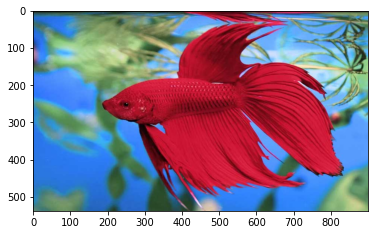

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('pez3.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

#SON DOS MASCARAS PORQUE EL ROJO VA DE 0 A 30 Y COMO ES UNA CIRCUNFERENCIA DE 179 A 150.

#Buscamos los valores que contengan rojos
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_rojo = np.array([0,128,50])
upper_rojo = np.array([30,255,255])
# Obtenemos una mascara con los valores de rojos
mask = cv2.inRange(img_hsv, lower_rojo, upper_rojo)
lower_rojo = np.array([150,128,50])
upper_rojo = np.array([179,255,255])
mask2 = cv2.inRange(img_hsv, lower_rojo, upper_rojo)
mask=cv2.bitwise_or(mask,mask2)
# Hacemos una operacion AND entre la imagen original y mascara
res = cv2.bitwise_and(img,img, mask= mask)
cv2.imshow('Original',img)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
while (1):
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
plt.figure()
plt.imshow(res)


### Otros Modelos de Color
Existe otros espacios de color que dependiendo del objetivo que queramos analizar pueden ser interesantes usarlos.
#### Modelo YCrCb
Se utiliza para representar el color en aplicaciones sobre todo de compresión. Representa la lumninancia Y y dos bandas cromáticas. Los sistemas de compresión  reducen las bandas Cr y Cb a la mitad de la resolución de la imagen original. Se suele usar en sistemas de compresión mpeg y jpeg. 

Text(0.5, 1.0, 'Cb')

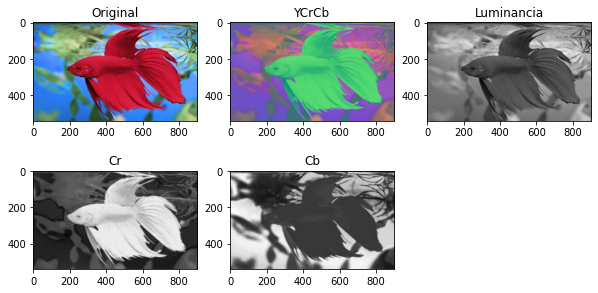

In [6]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('pez3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgYCrCb=cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(imgYCrCb)
plt.title("YCrCb")
plt.subplot(2,3,3)
plt.imshow(imgYCrCb[:,:,0],"gray")
plt.title("Luminancia")
plt.subplot(2,3,4)
plt.imshow(imgYCrCb[:,:,1],"gray")
plt.title("Cr")
plt.subplot(2,3,5)
plt.imshow(imgYCrCb[:,:,2],"gray")
plt.title("Cb")





#### Modelo Lab
Las siglas LAB se refieren al espacio de color tridimensional, en donde L  es luminosidad de negro a blanco, **a** va de rojo a verde y  **b** va de azul a amarillo. Actualmente se usa en Adobe Photoshop, archivos TIFF y documentos PDF.

Text(0.5, 1.0, 'b')

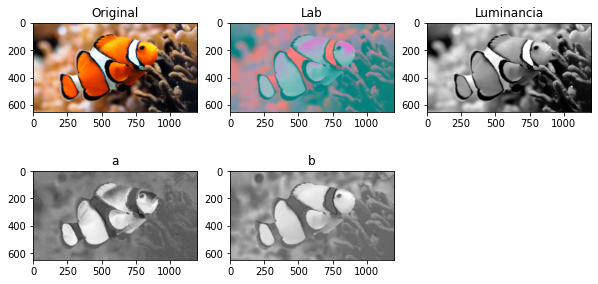

In [7]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('pez2.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgLab=cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(imgLab)
plt.title("Lab")
plt.subplot(2,3,3)
plt.imshow(imgLab[:,:,0],"gray")
plt.title("Luminancia")
plt.subplot(2,3,4)
plt.imshow(imgLab[:,:,1],"gray")
plt.title("a")
plt.subplot(2,3,5)
plt.imshow(imgLab[:,:,2],"gray")
plt.title("b")


### Histograma
El histograma es un grafo que nos permite visualizar la distribución de intensidad de una imagen. Analizando el histograma de una imagen, se puede obtener una aproximación al contraste, brillo, distribución de la intensidad de la imagen.  En Opencv podemos obtener el histograma usando  ***cv2.calcHist()***
La cabecera de esta función es la siguiente:

 **cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**
* images :  es la imagen sobre la que queremos obtener el histograma. Puede ser de tipo uint8 o float32. Se debe dar encerrada entre corchetes “[img]”.
* channels : Igualmente se indica entre corchetes. Es el índice del canal para el que queremos obtener el histograma. Si la imagen es una imagen de niveles de gris entonces le damos [0]. Pero si es una imagen de color le podemos dar el valor [0],[1] o [2], para obtener el histograma sobre el canal rojo, verde o azul respectivamente.
* mask : es la imagen máscara. Si queremos obtener el histograma sobre la imagen entera le damos el valor "None". Pero si queremos obtener el histograma sobre una región podemos indicarlo con la máscara. 
* histSize : cuantos contadores tendrá nuestro histograma. Si se quiere aplicar sobre una imagen de niveles de gris el numero de contadores será 256 normalmente. Para ello indicaremos [256].
* ranges : Sobre que rango de valores de la imagen de entrada queremos obtener el histograma. Normalemente será [0,256]
* hist: por defecto true. Indica si los bin son uniformes.
* accumulate: por defecto es false. Si es true no inicializa a cero el histograma para obtener el histograma de multiples imagenes.

    


In [ ]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)

plt.figure(figsize=(10,8))
hist= cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.plot(hist)
plt.xlim([0,256])

A continuación se muestra sobre una imagen de color los histogramas del rojo, verde y azul

(0.0, 256.0)

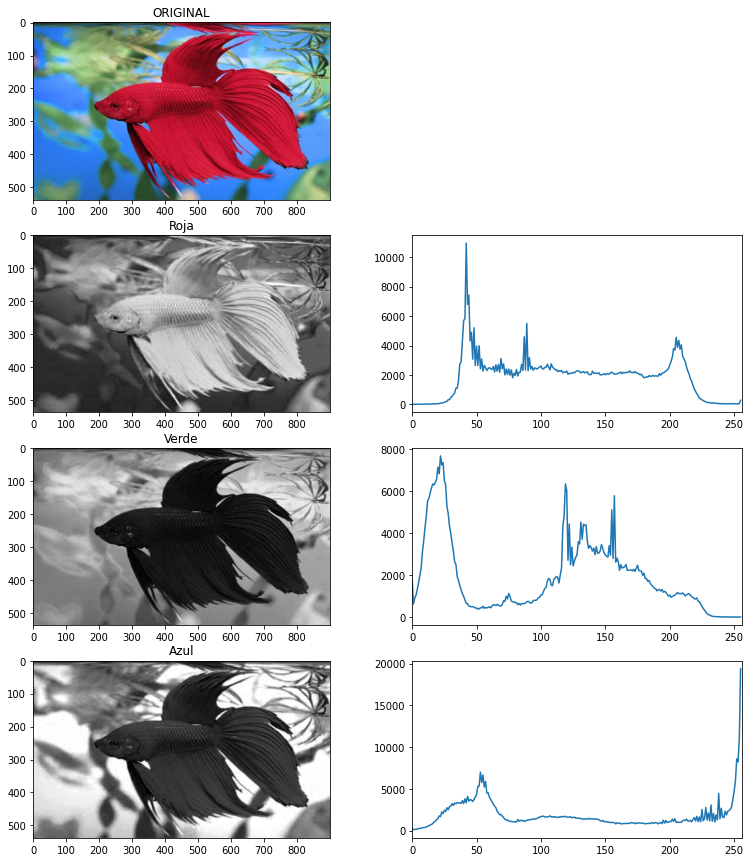

In [8]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('pez3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(13,15))
histrojo= cv2.calcHist([img],[0],None,[256],[0,256])
histverde= cv2.calcHist([img],[1],None,[256],[0,256])
histazul= cv2.calcHist([img],[2],None,[256],[0,256])

plt.subplot(421), plt.imshow(img),plt.title("ORIGINAL")
plt.subplot(423), plt.imshow(img[:,:,0],'gray'),plt.title("Roja")
plt.subplot(424), plt.plot(histrojo)
plt.xlim([0,256])
plt.subplot(425), plt.imshow(img[:,:,1],'gray'),plt.title("Verde")
plt.subplot(426), plt.plot(histverde)
plt.xlim([0,256])
plt.subplot(427), plt.imshow(img[:,:,2],'gray'),plt.title("Azul")
plt.subplot(428), plt.plot(histazul)
plt.xlim([0,256])

Mostramos el histograma del color, saturación y brillo

(0.0, 256.0)

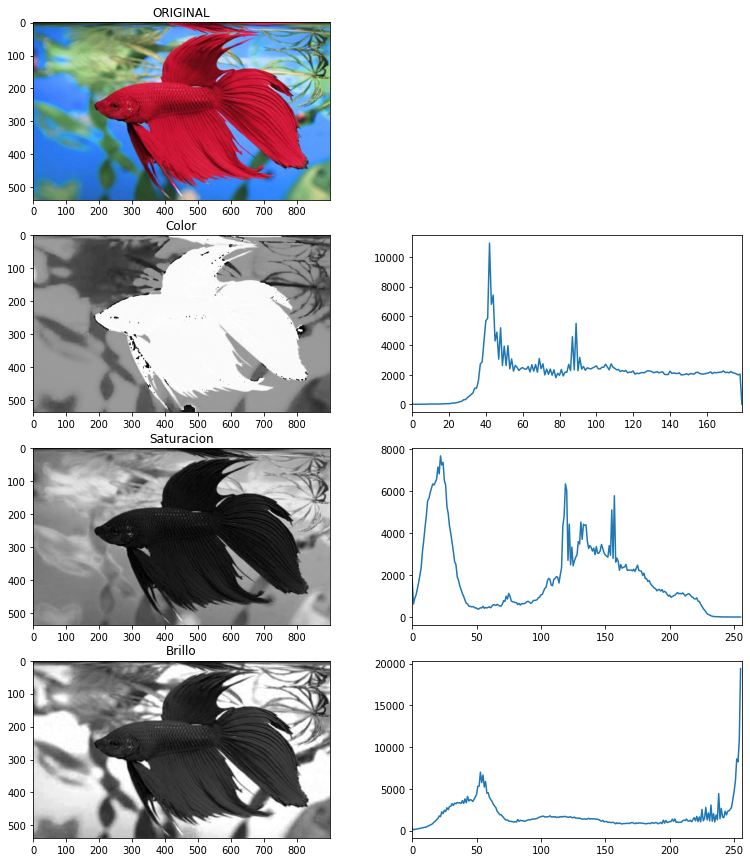

In [9]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('pez3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imghsv= cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

plt.figure(figsize=(13,15))
histcolor= cv2.calcHist([img],[0],None,[180],[0,179])
histsaturacion= cv2.calcHist([img],[1],None,[256],[0,256])
histbrillo= cv2.calcHist([img],[2],None,[256],[0,256])

plt.subplot(421), plt.imshow(img),plt.title("ORIGINAL")
plt.subplot(423), plt.imshow(imghsv[:,:,0],'gray'),plt.title("Color")
plt.subplot(424), plt.plot(histcolor)
plt.xlim([0,179])
plt.subplot(425), plt.imshow(img[:,:,1],'gray'),plt.title("Saturacion")
plt.subplot(426), plt.plot(histsaturacion)
plt.xlim([0,256])
plt.subplot(427), plt.imshow(img[:,:,2],'gray'),plt.title("Brillo")
plt.subplot(428), plt.plot(histbrillo)
plt.xlim([0,256])

### Ejercicios
<ol>
    <li> Obtener la representación en hsv de los colores: amarillo, naranja, púrpura,
    <li> Crear un video para obtener la gama de grises de una imagen       <li> Crear un video para obtener para el color verde todos sus valores diferentes en luminosidad.
    <li> Crear un video para obtener para el color azul todos sus valores diferentes en saturación
    <li> Sobre la imagen pez2 segmentar la información naranja
    <li> Sobre la imagen pez1 cambiar el azul a naranja 
    <li> Aplicar chroma_key sobre la imagen praga y la imagen de chica.  El objetivo es obtener una nueva imagen que en primer plano este la chica y en segundo plano praga. Permitir colocar la imagen de la chica en cualquier punto de la imagen de praga.
<table>
    <tr><td><img src="praga1.jpg"></td><td><img src="chica.jpg"></td><td><img src="res.jpg"></td></tr>
<tr><td>PRAGA</td><td>CHICA</td><td>RESULTADO</td></tr> 
</table>
    <li> Crear una función que dada una imagen de color obtenga el histograma del canal rojo, verde y azul pero de una región de interés.
</ol>        
        

###### 1º Obtener la representación en hsv de los colores: amarillo, naranja, púrpura,

Amarillo HSV:  [[[ 30 255 255]]]
Naranja HSV:  [[[ 19 255 255]]]
Púrpura HSV:  [[[150 255 128]]]


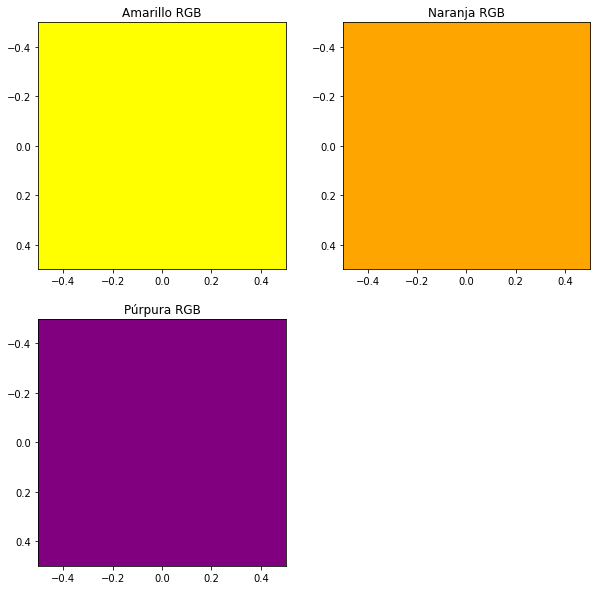

In [11]:
#Comprobamos que el color en RGB es el que creemos
yellow = np.uint8([[[255,255,0 ]]])
orange = np.uint8([[[255,165,0]]])
purple = np.uint8([[[128,0,128]]])

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(yellow)
plt.title("Amarillo RGB")

#Lo convertimos a HSV
hsv_yellow = cv2.cvtColor(yellow,cv2.COLOR_RGB2HSV)
print("Amarillo HSV: ",hsv_yellow)

#Comprobamos que el color en RGB es el que creemos
plt.subplot(2,2,2)
plt.imshow(orange)
plt.title("Naranja RGB")

#Lo convertimos a HSV
hsv_orange = cv2.cvtColor(orange,cv2.COLOR_RGB2HSV)
print("Naranja HSV: ",hsv_orange)

#Comprobamos que el color en RGB es el que creemos
plt.subplot(2,2,3)
plt.imshow(purple)
plt.title("Púrpura RGB")

#Lo convertimos a HSV
hsv_purple = cv2.cvtColor(purple,cv2.COLOR_RGB2HSV)
print("Púrpura HSV: ",hsv_purple)

La información del rango de colores exacto se ha extraído de la fuente: https://www.rapidtables.com/web/color/index.html

Si bien se podría haber optamos por sumar unir el máximo valor de los canales de rojo y verde para obtener el amarillo [255,255,0]. Hemos buscado tener exactamente el color conocido como púrpura, naranja o amarillo y por eso se ha realizado la búsqueda en la fuente anteriormente citada.

###### 2º Crear un video para obtener la gama de grises de una imagen

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

grey=np.ones((200, 200),dtype='uint8')*128
grey_bgr = cv2.cvtColor(grey,cv2.COLOR_GRAY2BGR)
greyhsv=cv2.cvtColor(grey_bgr, cv2.COLOR_BGR2HSV)
print("Gris: ",greyhsv[0,0,:])
fps=10

video =cv2.VideoWriter('grises.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
aux = greyhsv;

img_array = []

#Preguntar gama de grises nos movemos por el el valor brillo que nos da las distintas tonalidades.
for i in range(0,255):
    aux[:,:,2]=i
    #volvemos a rgb
    frame =cv2.cvtColor(aux,cv2.COLOR_HSV2BGR)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release();


Gris:  [  0   0 128]


###### 3º Crear un video para obtener para el color verde todos sus valores diferentes en luminosidad.

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

green=np.ones((200, 200,3),dtype='uint8')*255
green[:,:,0] = 0
green[:,:,2] = 0
greenhsv=cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print("Green: ",greyhsv[0,0,:])
fps=10

video =cv2.VideoWriter('verde_luminosidad.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
aux = greenhsv;

img_array = []

for i in range(0,255):
    aux[:,:,2]=i
    #volvemos a rgb
    frame =cv2.cvtColor(aux,cv2.COLOR_HSV2BGR)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release();

Green:  [  0   0 254]


###### 4º Crear un video para obtener para el color azul todos sus valores diferentes en saturación

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

blue=np.ones((200, 200,3),dtype='uint8')*255
blue[:,:,1] = 0
blue[:,:,2] = 0
bluehsv=cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print("Azul: ",bluehsv[0,0,:])
fps=10

video =cv2.VideoWriter('azul_saturacion.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
aux = bluehsv;

img_array = []

for i in range(0,255):
    aux[:,:,1]=i
    #volvemos a rgb
    frame =cv2.cvtColor(aux,cv2.COLOR_HSV2BGR)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release();

Azul:  [120 255 255]


###### 5º Sobre la imagen pez2 segmentar la información naranja

Text(0.5, 1.0, 'Only Orange')

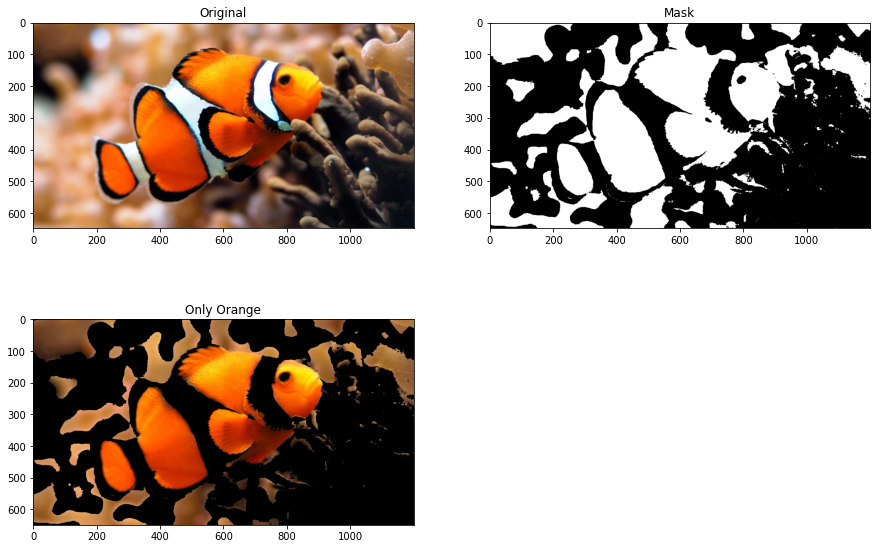

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('pez2.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Buscamos los valores que contengan naranjas
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_orange = np.array([0,128,50])
#previamente vimos que el valor H de naranja es 30
upper_orange = np.array([30,255,255])
# Obtenemos una mascara con los valores de naranjas
mask = cv2.inRange(img_hsv, lower_orange, upper_orange)
# Hacemos una operacion AND entre la imagen original y mascara
res = cv2.bitwise_and(img,img, mask= mask)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title("Mask")
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Only Orange")

###### 6º Sobre la imagen pez1 cambiar el azul a naranja

In [16]:
#Diferencia entre naranja
cv2.cvtColor(orange, cv2.COLOR_RGB2HSV)

array([[[ 19, 255, 255]]], dtype=uint8)

Text(0.5, 1.0, 'Orange')

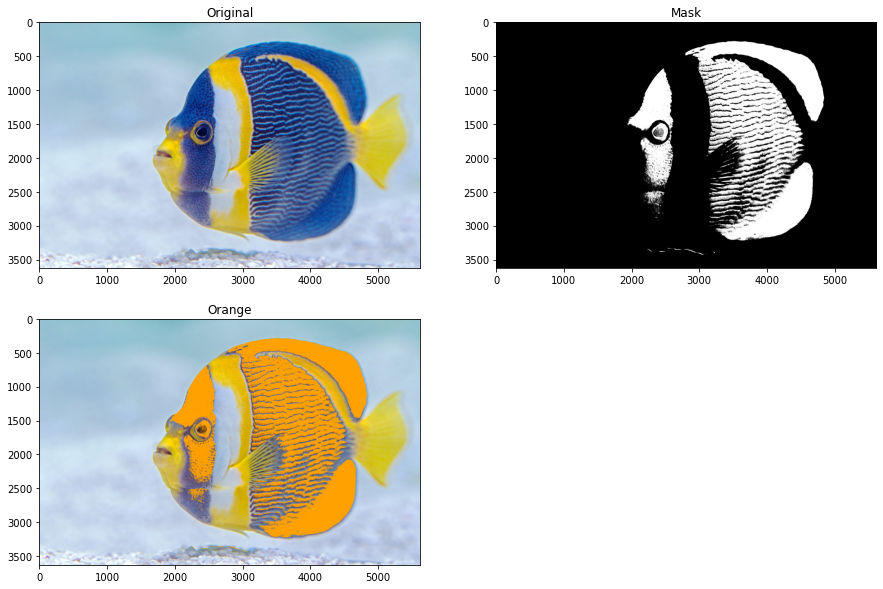

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('pez1.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Buscamos los valores que contengan naranjas
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_blue = np.array([60,128,50])
#previamente vimos que el valor H de naranja es 30
upper_blue = np.array([150,255,255])
# Obtenemos una mascara con los valores de naranjas
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)
# Hacemos una operacion AND entre la imagen original y mascara
res = img_hsv

#Aquellos puntos señalados por la mascara los convertimos a naranja
res[mask>0] = (19,255,255)

#res = cv2.bitwise_and(img,img, mask= mask)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title("Mask")
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_HSV2RGB))
plt.title("Orange")


###### 7º Aplicar chroma_key sobre la imagen praga y la imagen de chica. El objetivo es obtener una nueva imagen que en primer plano este la chica y en segundo plano praga. Permitir colocar la imagen de la chica en cualquier punto de la imagen de praga.

Text(0.5, 1.0, 'Imagen sin desplazamiento')

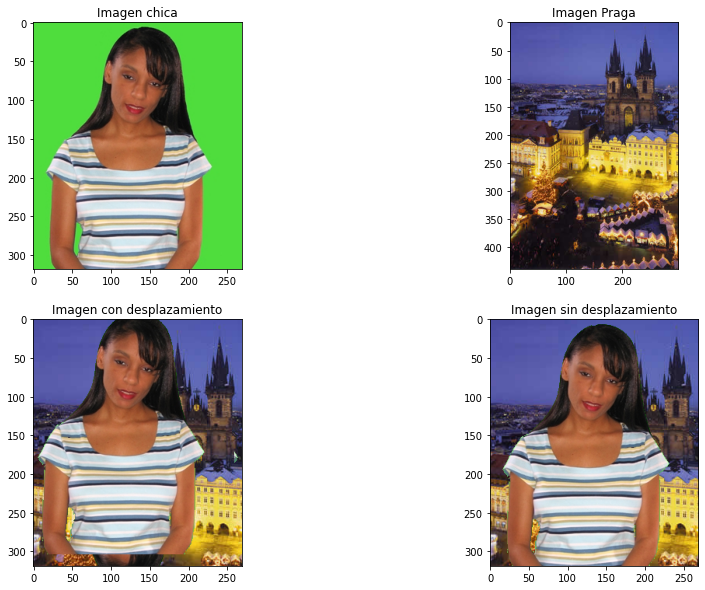

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Carga imagenes
img=cv2.imread('chica.jpg')
img2=cv2.imread('praga1.jpg')

#Pasamos de BGR a RGB
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

def chromaKey(img, img2, desplX=0, desplY=0):
    img_copy = np.copy(img)
    img2_copy = np.copy(img2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            posX = i+desplX
            posY = j+desplY
            if(posX >= img.shape[0]):
                posX = img.shape[0]-i+desplX
            if(posY >= img.shape[1]):
                posY = img.shape[1]-j+desplY
            img_copy[i, j] = img_copy[posX,posY]
            
    lower_green = np.array([0, 100, 0])     
    upper_green = np.array([120, 255, 100]) 

    mask = cv2.inRange(img_copy, lower_green, upper_green)

    img_copy[mask!=0] = [0,0,0]
    
    img2_copy = img2_copy[0:img.shape[0],0:img.shape[1]]
            
    img2_copy[mask==0] = [0,0,0]

    res = img_copy + img2_copy
    
    return res

res1 = chromaKey(img,img2,15,10)
res2 = chromaKey(img,img2)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Imagen chica")
plt.subplot(2,2,2)
plt.imshow(img2)
plt.title("Imagen Praga")
plt.subplot(2,2,3)
plt.imshow(res1)
plt.title("Imagen con desplazamiento")
plt.subplot(2,2,4)
plt.imshow(res2)
plt.title("Imagen sin desplazamiento")

###### 8º Crear una función que dada una imagen de color obtenga el histograma del canal rojo, verde y azul pero de una región de interés.

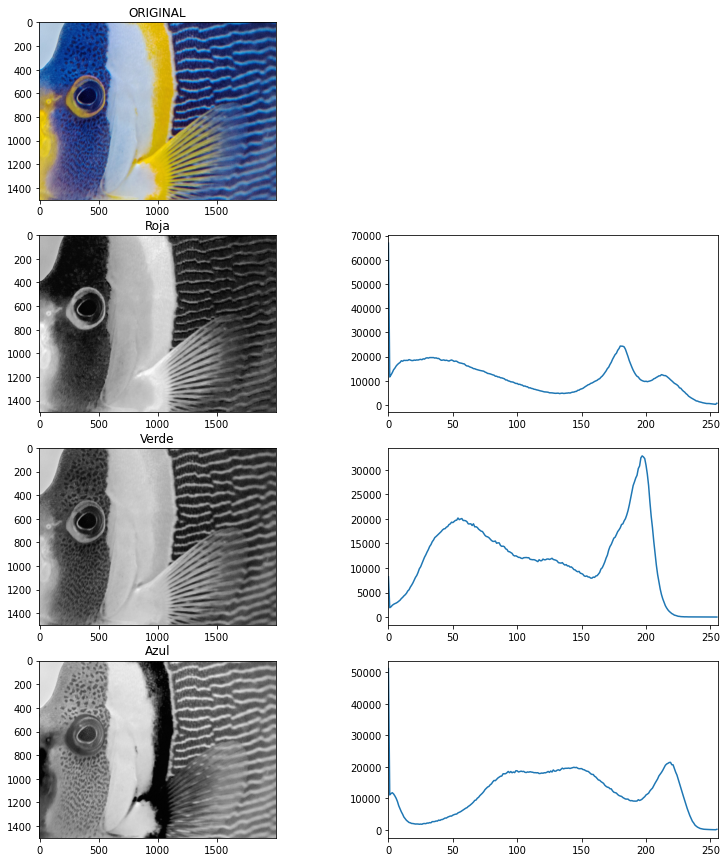

In [91]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('pez1.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

def histograms_Interest(img, x1=0, y1=img.shape[0], x2=0, y2=img.shape[1]):
    img_zone = img[x1:y1,x2:y2]
    
    plt.figure(figsize=(13,15))
    histrojo= cv2.calcHist([img_zone],[0],None,[256],[0,256])
    histverde= cv2.calcHist([img_zone],[1],None,[256],[0,256])
    histazul= cv2.calcHist([img_zone],[2],None,[256],[0,256])

    plt.subplot(421), plt.imshow(img_zone),plt.title("ORIGINAL")
    plt.subplot(423), plt.imshow(img_zone[:,:,0],'gray'),plt.title("Roja")
    plt.subplot(424), plt.plot(histrojo)
    plt.xlim([0,256])
    plt.subplot(425), plt.imshow(img_zone[:,:,1],'gray'),plt.title("Verde")
    plt.subplot(426), plt.plot(histverde)
    plt.xlim([0,256])
    plt.subplot(427), plt.imshow(img_zone[:,:,2],'gray'),plt.title("Azul")
    plt.subplot(428), plt.plot(histazul)
    plt.xlim([0,256])

histograms_Interest(img_rgb,1000,2500,2000,4000)